# Desenvolvendo um algorítmo de machine learning

In [1]:
#  importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- importando os dados dos delitos

In [2]:
delitos_ny = pd.read_csv('select_ny.csv')

In [3]:
delitos_ny.local_da_ocorrencia.value_counts()

dentro       432559
em_frente    189192
oposto        23389
atras         19406
Name: local_da_ocorrencia, dtype: int64

 - convertendo as colunas data para Datetime

In [4]:
delitos_ny['data_da_ocorrencia'] = pd.to_datetime(delitos_ny['data_da_ocorrencia'])

In [5]:
delitos_ny['data_final_da_ocorrencia'] = pd.to_datetime(delitos_ny['data_final_da_ocorrencia'])

In [6]:
delitos_ny['data_comunicacao_policia'] = pd.to_datetime(delitos_ny['data_comunicacao_policia'])

 - pegando apenas os delitos concluídos nos anos 2014 e 2015

In [7]:
delitos_ny = delitos_ny.query('conclusao == "concluido" and data_da_ocorrencia >= "2014-01-01"')

In [8]:
delitos_ny['data_da_ocorrencia'].dt.year.value_counts()

2014    303854
2015    294305
Name: data_da_ocorrencia, dtype: int64

 ##  Importando os dados da população de 2010-2030

In [9]:
populacao = pd.read_csv('populacao_2010-2020.csv')

In [10]:
populacao

,Age Group,Borough,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total
0,Total Population,NYC Total,"8,242,624",100%,"8,550,971",100%,"8,821,027",100%
1,Total Population,Bronx,"1,385,108",16.8%,"1,446,788",16.92%,"1,518,998",17.22%
2,Total Population,Brooklyn,"2,552,911",30.97%,"2,648,452",30.97%,"2,754,009",31.22%
3,Total Population,Manhattan,"1,585,873",19.24%,"1,638,281",19.16%,"1,676,720",19.01%
4,Total Population,Queens,"2,250,002",27.3%,"2,330,295",27.25%,"2,373,551",26.91%
5,Total Population,Staten Island,"468,730",5.69%,"487,155",5.7%,"497,749",5.64%


 - Tratando os dados do DataFrame "populacao"

In [11]:
#  renomenando as colunas e apagando a coluna que não pe necesssária
populacao = populacao.drop(columns = ['Age Group'])
populacao.columns = ['Bairro','Total_poplacao_2010', '%Populacao_por_bairro-2010', 'Total_poplacao_2020', '%Populacao_por_bairro-2020'
                    ,'Total_poplacao_2030', '%Populacao_por_bairro-2030']

In [12]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Bairro                      6 non-null      object
 1   Total_poplacao_2010         6 non-null      object
 2   %Populacao_por_bairro-2010  6 non-null      object
 3   Total_poplacao_2020         6 non-null      object
 4   %Populacao_por_bairro-2020  6 non-null      object
 5   Total_poplacao_2030         6 non-null      object
 6   %Populacao_por_bairro-2030  6 non-null      object
dtypes: object(7)
memory usage: 464.0+ bytes


 ## Definindo as variáveis, agrupando por categorias e em valores numéricos
 
 
  - nivel de ofensa(contravenção, crime, violação)
  - bairro
  - local da ocorrencia
  - delitos com maiores ocorrencias
  - delitos mais graves

### 1-  Nivel de ofensa
  
  - contravenção
  - crime
  - violação

In [13]:
nivel_de_ofensa = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.nivel_de_ofensa ).reset_index()

In [14]:
nivel_de_ofensa.head()

nivel_de_ofensa,data_da_ocorrencia,contravencao,crime,violacao
0,2014-01-01,855,416,153
1,2014-01-02,415,231,83
2,2014-01-03,341,201,101
3,2014-01-04,396,208,83
4,2014-01-05,390,201,86


 - Visualizando a distibuição dos delitos classificados como crime, contravenção e violação, nos anos de 2014 e 2015.

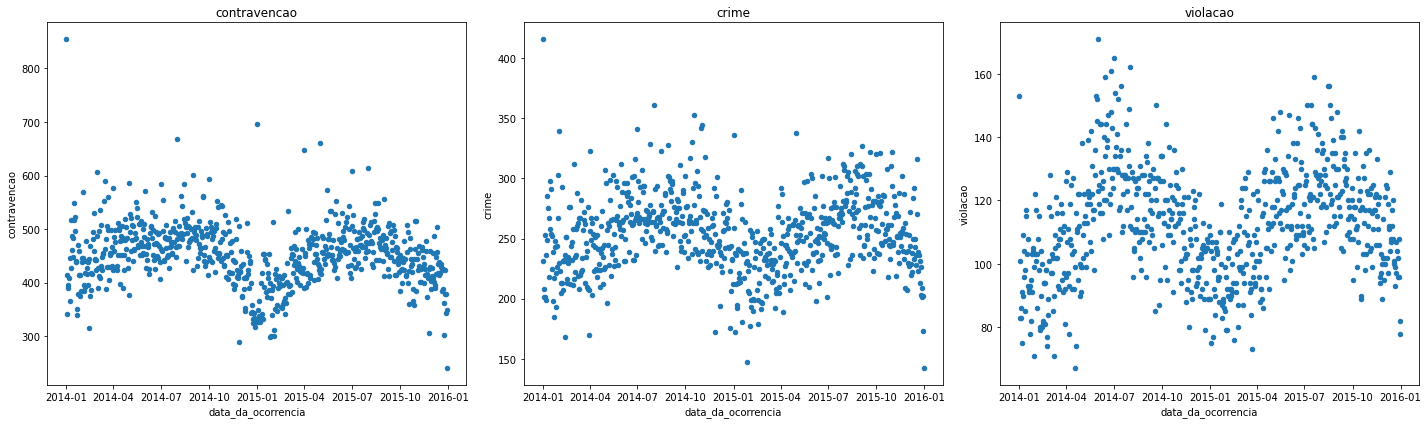

In [15]:
fig, ax = plt.subplots(1,3,figsize=(20,6))
nivel_de_ofensa.plot(x='data_da_ocorrencia',y='contravencao',kind='scatter',ax=ax[0],title='contravencao');
nivel_de_ofensa.plot(x='data_da_ocorrencia',y='crime',kind='scatter',ax=ax[1],title='crime');
nivel_de_ofensa.plot(x='data_da_ocorrencia',y='violacao',kind='scatter',ax=ax[2],title='violacao');
plt.tight_layout();

 - criando novo DataFrame colocando a data como índice

In [16]:
nivel_de_ofensa_geral = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.nivel_de_ofensa )

In [17]:
nivel_de_ofensa_geral.head()

nivel_de_ofensa,contravencao,crime,violacao
data_da_ocorrencia,,,
2014-01-01,855,416,153
2014-01-02,415,231,83
2014-01-03,341,201,101
2014-01-04,396,208,83
2014-01-05,390,201,86


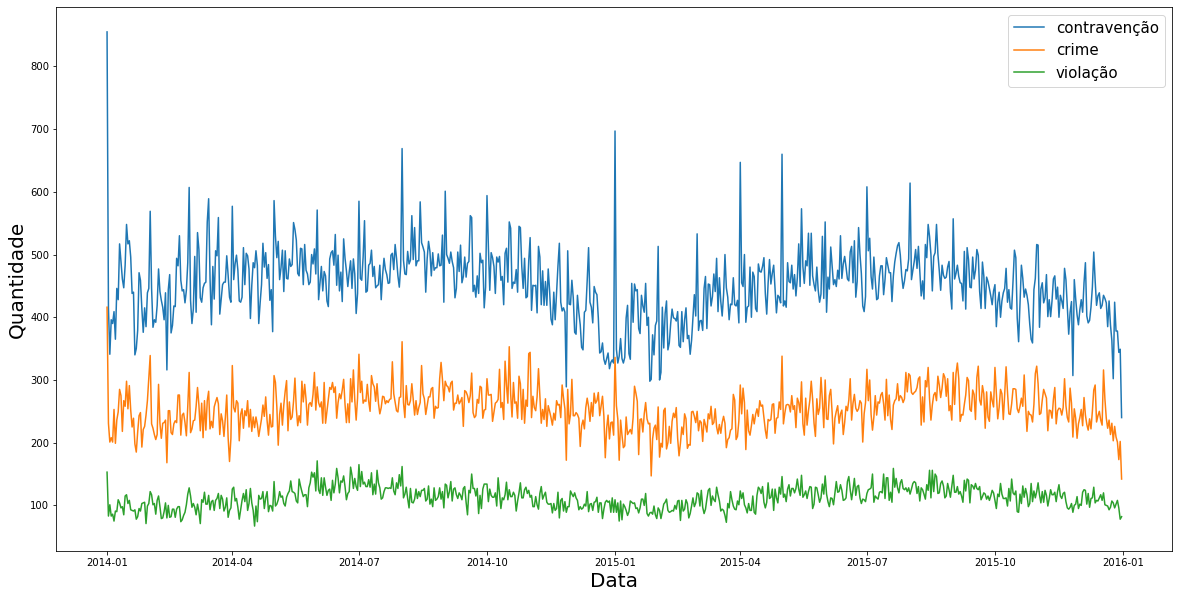

In [18]:
plt.figure(figsize=(20,10))
plt.plot(nivel_de_ofensa_geral)
plt.xlabel('Data', fontsize=20)
plt.ylabel('Quantidade', fontsize=20)
legenda = ['contravenção','crime', 'violação']
plt.legend(legenda, fontsize=15)
plt.show()

 ### 2- Bairro

In [19]:
qtde_ocorrencia_dia = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.bairro)

In [20]:
qtde_ocorrencia_dia.head()

bairro,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
data_da_ocorrencia,,,,,
2014-01-01,247,420,334,343,80
2014-01-02,126,235,153,178,37
2014-01-03,134,174,173,132,30
2014-01-04,143,229,151,135,29
2014-01-05,115,215,178,144,25


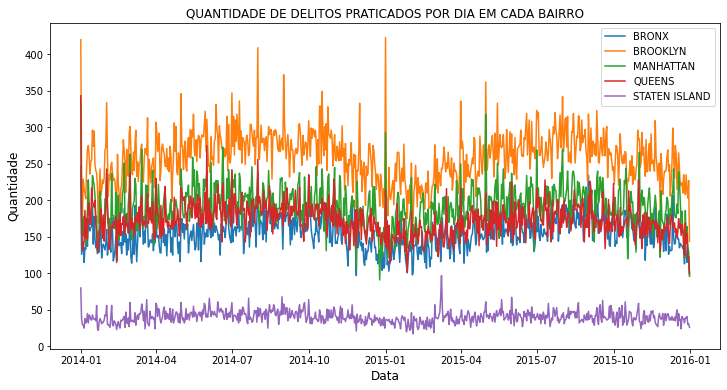

In [21]:
plt.figure(figsize=(12,6))
plt.plot(qtde_ocorrencia_dia)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
legenda = ['BRONX','BROOKLYN', 'MANHATTAN','QUEENS','STATEN ISLAND']
plt.legend(legenda, fontsize=10,loc=1)
plt.title('QUANTIDADE DE DELITOS PRATICADOS POR DIA EM CADA BAIRRO', fontsize=12)
plt.show()

### 3-  Local da ocorrencia

In [22]:
local_da_ocorrencia = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.local_da_ocorrencia).reset_index()

In [23]:
local_da_ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   data_da_ocorrencia  730 non-null    datetime64[ns]
 1   atras               730 non-null    int64         
 2   dentro              730 non-null    int64         
 3   em_frente           730 non-null    int64         
 4   oposto              730 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 28.6 KB


In [24]:
local_da_ocorrencia.head()

local_da_ocorrencia,data_da_ocorrencia,atras,dentro,em_frente,oposto
0,2014-01-01,44,928,415,37
1,2014-01-02,26,510,172,21
2,2014-01-03,12,486,135,10
3,2014-01-04,15,494,159,19
4,2014-01-05,11,456,190,20


In [25]:
#  classificando os delitos apenas como sendo dentro / fora  dos estabelecimentos


new_local_da_ocorrencia = {'atras': "fora", 'dentro': "dentro", 'em_frente': "fora", 
                           'oposto': "fora" }
delitos_ny['local_da_ocorrencia'] = delitos_ny['local_da_ocorrencia'].map(new_local_da_ocorrencia)

In [26]:
delitos_ny.local_da_ocorrencia.value_counts()

dentro    387272
fora      210887
Name: local_da_ocorrencia, dtype: int64

In [27]:
local_da_ocorrencia = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.local_da_ocorrencia)
local_da_ocorrencia.head()

local_da_ocorrencia,dentro,fora
data_da_ocorrencia,,
2014-01-01,928,496
2014-01-02,510,219
2014-01-03,486,157
2014-01-04,494,193
2014-01-05,456,221


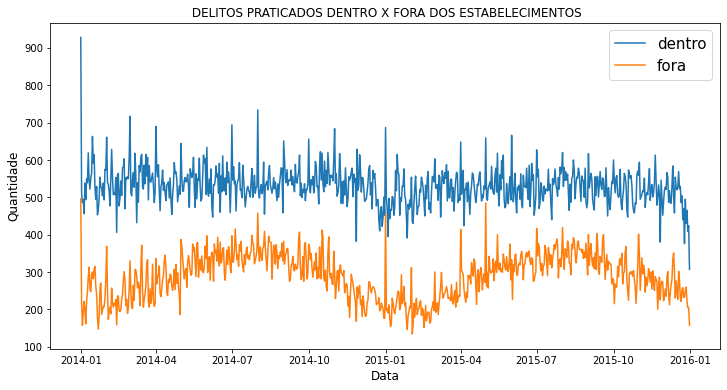

In [28]:
plt.figure(figsize=(12,6))
plt.plot(local_da_ocorrencia)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
legenda = ['dentro','fora']
plt.title(' DELITOS PRATICADOS DENTRO X FORA DOS ESTABELECIMENTOS', fontsize=12)
plt.legend(legenda, fontsize=15)
plt.show()

In [29]:
# sns.set_palette('Accent')
# sns.set_style('darkgrid')
# ax=sns.lineplot(x='data_da_ocorrencia', y='dentro', data = local_da_ocorrencia)
# ax.figure.set_size_inches(14,7)
# ax.set_title('Delitos praticados dentro dos estabelecimentos', loc='left', fontsize=18)
# ax.set_xlabel('Data dos delitos', fontsize=14)
# ax.set_ylabel('Quatidade de delitos', fontsize=14)
# ax=ax

### 4 -  Descrição da ofensa

 - criando um dataframe data x descrição dos delitos

In [30]:
descricao_da_ofensa = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.descricao_da_ofensa)

In [31]:
descricao_da_ofensa.head()

descricao_da_ofensa,ABORTION,ADMINISTRATIVE CODE,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,ALCOHOLIC BEVERAGE CONTROL LAW,ANTICIPATORY OFFENSES,ARSON,ASSAULT 3 & RELATED OFFENSES,BURGLAR'S TOOLS,BURGLARY,CHILD ABANDONMENT/NON SUPPORT,...,PROSTITUTION & RELATED OFFENSES,RAPE,ROBBERY,SEX CRIMES,THEFT OF SERVICES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,UNDER THE INFLUENCE OF DRUGS,UNLAWFUL POSS. WEAP. ON SCHOOL,VEHICLE AND TRAFFIC LAWS
data_da_ocorrencia,,,,,,,,,,,,,,,,,,,,,
2014-01-01,0,2,0,1,0,6,221,0,34,0,...,0,16,20,43,0,33,7,0,0,2
2014-01-02,0,8,0,0,0,1,51,0,49,0,...,0,1,21,5,0,5,4,0,0,2
2014-01-03,0,0,0,0,0,9,84,0,23,0,...,1,3,14,3,0,13,2,0,0,1
2014-01-04,0,2,0,0,0,6,84,0,33,0,...,0,2,18,3,0,6,0,0,0,3
2014-01-05,0,5,0,0,0,1,89,1,30,0,...,0,2,20,8,0,7,3,0,0,2


- separando os delitos em :
 - delitos com maiores ocorrencias
 - delitos mais graves

### 4.1 Tipos de delitos mais frequentes

In [32]:
delitos_ny.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     117139
HARRASSMENT 2                      81317
ASSAULT 3 & RELATED OFFENSES       67875
CRIMINAL MISCHIEF & RELATED OF     62065
GRAND LARCENY                      58116
Name: descricao_da_ofensa, dtype: int64

In [33]:
delitos_mais_frequentes = descricao_da_ofensa.loc[:,['PETIT LARCENY','HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES',
                                                     'CRIMINAL MISCHIEF & RELATED OF','GRAND LARCENY']]

In [34]:
delitos_mais_frequentes.head()

descricao_da_ofensa,PETIT LARCENY,HARRASSMENT 2,ASSAULT 3 & RELATED OFFENSES,CRIMINAL MISCHIEF & RELATED OF,GRAND LARCENY
data_da_ocorrencia,,,,,
2014-01-01,151,151,221,263,111
2014-01-02,152,83,51,74,67
2014-01-03,99,100,84,68,60
2014-01-04,139,83,84,54,54
2014-01-05,108,85,89,78,62


In [35]:
# plt.figure(figsize=(20,10))
# plt.plot(delitos_mais_frequentes)
# plt.xlabel('Data', fontsize=12)
# plt.ylabel('Quantidade', fontsize=12)
# legenda = ['PETIT LARCENY','HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES','CRIMINAL MISCHIEF & RELATED OF','GRAND LARCENY']
# plt.title('TIPOS DE DELITOS MAIS FREQUENTES', fontsize=12)
# plt.legend(legenda, fontsize=15)
# plt.show()

### 4.2 Delitos mais graves

In [36]:
# delitos_ny.descricao_da_ofensa.value_counts().head(40)

In [37]:
# 'HARRASSMENT 2','FELONY ASSAULT','DANGEROUS DRUGS','SEX CRIMES','DANGEROUS WEAPONS'

In [38]:
delitos_mais_graves = descricao_da_ofensa.loc[:,['FELONY ASSAULT','DANGEROUS DRUGS',
                                                 'SEX CRIMES','DANGEROUS WEAPONS']]

In [39]:
delitos_mais_graves.columns = ['crime_de_assalto','drogas_perigosas','crimes_sexuais','armas_perigosas']

In [40]:
delitos_mais_graves.head()

,crime_de_assalto,drogas_perigosas,crimes_sexuais,armas_perigosas
data_da_ocorrencia,,,,
2014-01-01,87,40,43,21
2014-01-02,29,38,5,10
2014-01-03,23,28,3,5
2014-01-04,28,29,3,12
2014-01-05,27,24,8,6


In [41]:
# plt.figure(figsize=(18,10))
# plt.plot(delitos_mais_graves)
# plt.xlabel('Data', fontsize=12)
# plt.ylabel('Quantidade', fontsize=12)
# legenda = ['crime_de_assalto','drogas_perigosas','crimes_sexuais','armas_perigosas']
# plt.title('TIPOS DE DELITOS MAIS graves', fontsize=12)
# plt.legend(legenda, fontsize=15, loc=1)
# plt.show()

 ## Selecionando a variável "crimes_sexuais" e observando seu comportamento ao longo do tempo

 - Crimes sexuais x tempo

In [42]:
delitos_mais_graves.head()

,crime_de_assalto,drogas_perigosas,crimes_sexuais,armas_perigosas
data_da_ocorrencia,,,,
2014-01-01,87,40,43,21
2014-01-02,29,38,5,10
2014-01-03,23,28,3,5
2014-01-04,28,29,3,12
2014-01-05,27,24,8,6


In [43]:
# plt.figure(figsize=(15,8))
# delitos_mais_graves.crimes_sexuais.plot()
# plt.xticks(rotation=45)
# plt.xlabel('Data')
# plt.ylabel('Quantidade')
# plt.tight_layout()

 - Criando o DataFrame "crimes_sexuais"

In [44]:
crimes_sexuais = delitos_mais_graves.crimes_sexuais.to_frame()

 - Graficando "crimes_sexuais"

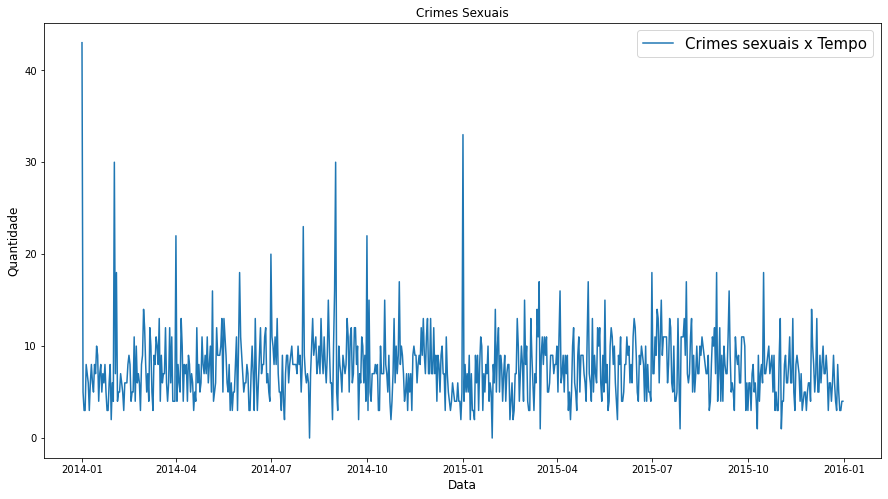

In [45]:
plt.figure(figsize=(15,8))
plt.plot(crimes_sexuais)
plt.title('Crimes Sexuais', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
legenda= ['Crimes sexuais x Tempo']
plt.legend(legenda, fontsize=15, loc=1)
plt.show()

## Fazendo a decomposição sazonal

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [47]:
resultado = seasonal_decompose(crimes_sexuais, period=12)

 - obtendo os componentes

In [48]:
tendencia = resultado.trend
sazonalidade = resultado.seasonal
residuo = resultado.resid

Text(0.5, 1.0, 'Tendencia')

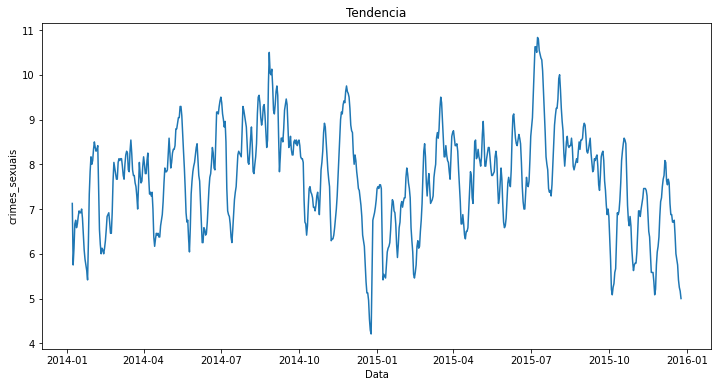

In [49]:
plt.figure(figsize=(12,6))
plt.plot(tendencia)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Tendencia')

Text(0.5, 1.0, 'Sazonalidade')

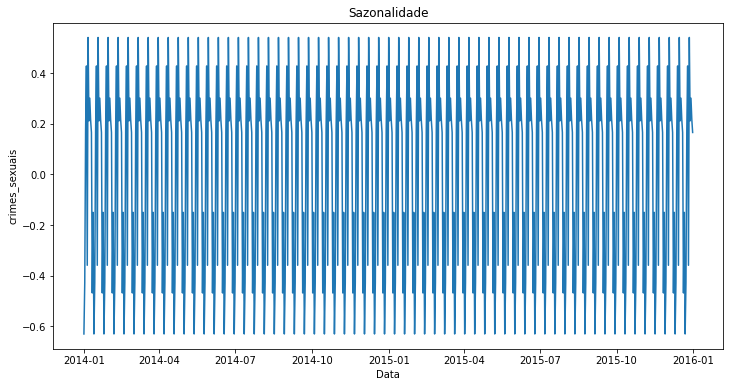

In [50]:
plt.figure(figsize=(12,6))
plt.plot(sazonalidade)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Sazonalidade')

Text(0.5, 1.0, 'Resíduo')

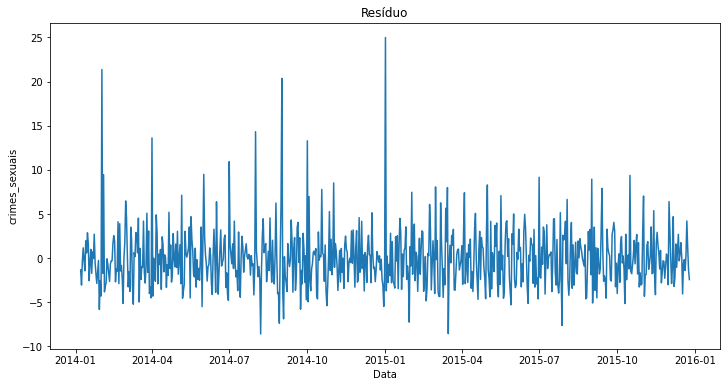

In [51]:
plt.figure(figsize=(12,6))
plt.plot(residuo)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Resíduo')
